In [1]:
import sys
import numpy as np
import pandas as pd

sys.path.append('/home/stacyste/Documents/Research/OverloadedSignaling/Simulations')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#seed is actually 1230
simRSARec = pd.read_pickle('./simulation_recursion_a4_r8_seed230_3ItemFullVocabRSA.pkl')
dfForAnalysis = simRSARec.loc[simRSARec['CentralControl_actor'] == 'receiver']

In [4]:
simRSARec.loc[0:5]

,signalerLocation,receiverLocation,intention,signalSpace,targetDictionary,nTargets,propRelevantSignalsInVocab,RSA_S0R0_sChoice,RSA_S0R0_rChoice,RSA_S0R0_sAchievesGoal,...,RSA_S3R2_utility,RSA_S3R3_sChoice,RSA_S3R3_rChoice,RSA_S3R3_sAchievesGoal,RSA_S3R3_rAchievesGoal,RSA_S3R3_goalAchieved,RSA_S3R3_utility,CentralControl_utility,CentralControl_actor,DIYSignaler_utility
0,"(4, 0)","(4, 7)",purple circle,"[circle, triangle, red, purple]","{(7, 5): 'red triangle', (3, 4): 'red circle',...",3,1.0,purple,purple circle,False,...,5,purple circle,None,True,False,True,5,5,signaler,5
1,"(4, 0)","(4, 7)",green circle,"[circle, purple, green, triangle, red]","{(5, 3): 'green circle', (2, 6): 'red triangle...",3,1.0,circle,green circle,False,...,3,green circle,None,True,False,True,4,4,signaler,4
2,"(4, 0)","(4, 7)",purple square,"[purple, circle, square, red]","{(2, 5): 'red circle', (3, 1): 'purple square'...",3,1.0,square,purple square,False,...,6,purple square,None,True,False,True,6,6,signaler,6
3,"(4, 0)","(4, 7)",purple circle,"[red, square, green, purple, circle]","{(0, 5): 'green square', (2, 4): 'red circle',...",3,1.0,purple,purple circle,False,...,4,purple circle,None,True,False,True,4,4,signaler,4
4,"(4, 0)","(4, 7)",red triangle,"[triangle, circle, green, purple, red, square]","{(7, 4): 'red triangle', (1, 7): 'green circle...",3,1.0,red,red triangle,False,...,2,triangle,red triangle,False,True,True,2,2,receiver,1
5,"(4, 0)","(4, 7)",green triangle,"[circle, red, triangle, green, square]","{(1, 2): 'red square', (7, 0): 'red circle', (...",3,1.0,green,green triangle,False,...,1,triangle,green triangle,False,True,True,1,1,receiver,0


In [10]:
def getPercentFromOptimalUtilityDF(df):
    percentFromOptimalUtil = pd.DataFrame(index=df.index)
    utilityColumns = [x for x in df.columns if 'utility' in x]
    
    for utilityName in utilityColumns:
        u_optimal = 'CentralControl_utility'
        percentFromOptimalUtil[utilityName] = 100.0*(df[utilityName]/df[u_optimal])#df[utilityName]-df[u_optimal] #
    return(percentFromOptimalUtil)

In [6]:
def getProportionTargetReached(df):
    propTrialsTargetReached = pd.DataFrame(columns=['signaler', 'receiver'])
    getPropTrue =  lambda colName: df[colName].value_counts(normalize=True).loc[True] if (True in df[colName].value_counts(normalize=True).index) else 0.0
    
    sLabels = [x for x in df.columns if 'sAchievesGoal' in x]
    rLabels = [x for x in df.columns if 'rAchievesGoal' in x]
    for s, r in zip(sLabels, rLabels):
        propTrialsTargetReached.loc[s] = [getPropTrue(s), getPropTrue(r)]

    propTrialsTargetReached['total'] = propTrialsTargetReached['signaler'] + propTrialsTargetReached['receiver']

    propTrialsTargetReached['marginOfErrorS'] =  1.96*np.sqrt((propTrialsTargetReached['signaler']*(1-propTrialsTargetReached['signaler']))/df.shape[0])
    propTrialsTargetReached['marginOfErrorR'] =  1.96*np.sqrt((propTrialsTargetReached['receiver']*(1-propTrialsTargetReached['receiver']))/df.shape[0])

    return(propTrialsTargetReached)

In [11]:
getProportionTargetReached(dfForAnalysis)

,signaler,receiver,total,marginOfErrorS,marginOfErrorR
RSA_S0R0_sAchievesGoal,0.000000,0.745347,0.745347,0.000000,0.024837
RSA_S0R1_sAchievesGoal,0.000000,0.751269,0.751269,0.000000,0.024644
RSA_S0R2_sAchievesGoal,0.000000,0.744501,0.744501,0.000000,0.024864
RSA_S0R3_sAchievesGoal,0.000000,0.760575,0.760575,0.000000,0.024328
RSA_S1R0_sAchievesGoal,0.047377,0.910321,0.957699,0.012111,0.016289
RSA_S1R1_sAchievesGoal,0.048223,0.937394,0.985618,0.012214,0.013811
RSA_S1R2_sAchievesGoal,0.049915,0.949239,0.999154,0.012415,0.012514
RSA_S1R3_sAchievesGoal,0.049915,0.950085,1.000000,0.012415,0.012415
RSA_S2R0_sAchievesGoal,0.014382,0.926396,0.940778,0.006788,0.014887
RSA_S2R1_sAchievesGoal,0.008460,0.974619,0.983080,0.005221,0.008966


In [26]:
getPercentFromOptimalUtilityDF(dfForAnalysis)

,RSA_S0R0_utility,RSA_S0R1_utility,RSA_S0R2_utility,RSA_S0R3_utility,RSA_S1R0_utility,RSA_S1R1_utility,RSA_S1R2_utility,RSA_S1R3_utility,RSA_S2R0_utility,RSA_S2R1_utility,RSA_S2R2_utility,RSA_S2R3_utility,RSA_S3R0_utility,RSA_S3R1_utility,RSA_S3R2_utility,RSA_S3R3_utility,CentralControl_utility,DIYSignaler_utility
3,-11,0,-11,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1
4,-5,-5,-5,0,0,-3,0,0,-5,0,0,-5,-5,0,0,0,0,-3
5,0,0,0,0,0,-8,0,-8,0,0,0,0,0,0,0,-8,0,-7
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-7
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-7
8,0,-11,-11,0,0,0,0,0,0,0,0,-11,0,-11,-11,0,0,-7
9,0,-13,-13,-13,0,0,0,-13,-12,0,0,0,0,0,0,-13,0,-7
10,0,-13,-13,0,0,0,0,-5,0,-13,0,0,0,-13,0,0,0,-5
11,0,-12,-9,-12,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,0,-3
13,0,-14,0,-14,-9,-9,-9,-9,0,-9,-9,-9,-9,0,0,-9,0,-7


In [12]:
meanUtilDifference = getPercentFromOptimalUtilityDF(dfForAnalysis).mean()

In [13]:
meanUtilDifference

RSA_S0R0_utility           34.656958
RSA_S0R1_utility           32.977198
RSA_S0R2_utility           32.099146
RSA_S0R3_utility           38.847595
RSA_S1R0_utility           88.276126
RSA_S1R1_utility           94.182580
RSA_S1R2_utility           96.389090
RSA_S1R3_utility           96.638869
RSA_S2R0_utility           84.450487
RSA_S2R1_utility           96.187253
RSA_S2R2_utility           99.493796
RSA_S2R3_utility           99.871686
RSA_S3R0_utility           83.593183
RSA_S3R1_utility           94.801587
RSA_S3R2_utility           99.957699
RSA_S3R3_utility           99.866046
CentralControl_utility    100.000000
DIYSignaler_utility       -30.214326
dtype: float64

In [29]:
dfForAnalysis[[x for x in dfForAnalysis.columns if 'utility' in x]]

,RSA_S0R0_utility,RSA_S0R1_utility,RSA_S0R2_utility,RSA_S0R3_utility,RSA_S1R0_utility,RSA_S1R1_utility,RSA_S1R2_utility,RSA_S1R3_utility,RSA_S2R0_utility,RSA_S2R1_utility,RSA_S2R2_utility,RSA_S2R3_utility,RSA_S3R0_utility,RSA_S3R1_utility,RSA_S3R2_utility,RSA_S3R3_utility,CentralControl_utility,DIYSignaler_utility
3,-10,1,-10,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,-3,-3,-3,2,2,-1,2,2,-3,2,2,-3,-3,2,2,2,2,-1
5,6,6,6,6,6,-2,6,-2,6,6,6,6,6,6,6,-2,6,-1
6,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,-4
7,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,-3
8,6,-5,-5,6,6,6,6,6,6,6,6,-5,6,-5,-5,6,6,-1
9,7,-6,-6,-6,7,7,7,-6,-5,7,7,7,7,7,7,-6,7,0
10,6,-7,-7,6,6,6,6,1,6,-7,6,6,6,-7,6,6,6,1
11,3,-9,-6,-9,0,0,0,0,0,0,0,0,0,0,0,0,3,0
13,6,-8,6,-8,-3,-3,-3,-3,6,-3,-3,-3,-3,6,6,-3,6,-1


In [19]:
x = list(meanUtilDifference.loc['RSA_S0R0_utility': 'RSA_S3R3_utility'])
y = x[-4:] + x[-8:-4]+ x[-12:-8]
utilGrid = np.array(y).reshape(3,4)

In [18]:
x[:-12]

[34.656957537668205,
 32.977197647248396,
 32.099145918942874,
 38.847594875513636]

In [20]:
utilGrid

array([[83.59318347, 94.8015873 , 99.95769882, 99.86604625],
       [84.45048747, 96.18725324, 99.49379583, 99.87168641],
       [88.27612602, 94.18257997, 96.38909032, 96.63886875]])

In [21]:
import seaborn as sns

Text(33.0, 0.5, 'Signaler')

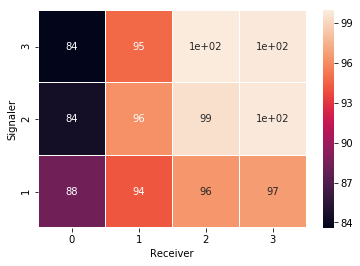

In [22]:
ax = sns.heatmap(utilGrid, linewidths = .05, annot = True,xticklabels = [0, 1, 2, 3],yticklabels = [3, 2,1] )
ax.set_xlabel("Receiver")
ax.set_ylabel("Signaler")

